In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import accuracy_score

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [5]:
from sklearn.tree import DecisionTreeClassifier

## Использование деревьев решений

In [4]:
X_train = pd.read_pickle('X_train.pkl')
X_valid = pd.read_pickle('X_valid.pkl')

y_train = pd.read_pickle('y_train.pkl')
y_valid = pd.read_pickle('y_valid.pkl')
X_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.657186,29.476233,0.553892,0.372754,32.179397,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,13.009962,1.185279,0.795588,51.604012,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.925000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,29.699118,0.000000,0.000000,14.400000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,30.500000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


C = 2 
	acc_valid = 0.7757847533632287 
	acc_train = 0.8023952095808383

C = 3 
	acc_valid = 0.8026905829596412 
	acc_train = 0.8323353293413174

C = 4 
	acc_valid = 0.8071748878923767 
	acc_train = 0.842814371257485

C = 5 
	acc_valid = 0.8026905829596412 
	acc_train = 0.8488023952095808

C = 6 
	acc_valid = 0.7668161434977578 
	acc_train = 0.8577844311377245

C = 7 
	acc_valid = 0.8071748878923767 
	acc_train = 0.875748502994012

C = 8 
	acc_valid = 0.7623318385650224 
	acc_train = 0.8967065868263473

C = 9 
	acc_valid = 0.7757847533632287 
	acc_train = 0.9131736526946108

C = 10 
	acc_valid = 0.7354260089686099 
	acc_train = 0.9341317365269461

C = 11 
	acc_valid = 0.757847533632287 
	acc_train = 0.9491017964071856

C = 12 
	acc_valid = 0.7399103139013453 
	acc_train = 0.9580838323353293

C = 13 
	acc_valid = 0.7443946188340808 
	acc_train = 0.9700598802395209

C = 14 
	acc_valid = 0.7219730941704036 
	acc_train = 0.9760479041916168

C = 15 
	acc_valid = 0.726457399103139 
	acc_trai

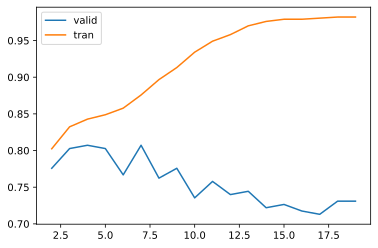

In [9]:
accuracy_valid = []
accuracy_train = []
d_vals = np.arange(2, 20)
for val in d_vals:
    clf = DecisionTreeClassifier(max_depth=val, random_state=100)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print(f'C = {val} \n\tacc_valid = {acc_valid} \n\tacc_train = {acc_train}\n')
    
plt.plot(d_vals, accuracy_valid)
plt.plot(d_vals, accuracy_train)
plt.legend(['valid', 'tran']);

In [11]:
clf = DecisionTreeClassifier(max_depth=7, random_state=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)
y_pred_train = clf.predict(X_train)
accuracy_valid = accuracy_score(y_valid, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

In [12]:
accuracy_valid, accuracy_train

(0.8071748878923767, 0.875748502994012)

## Random Forest 

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [15]:
parameters = [{'n_estimators':[150,200,250],
              'max_features': np.arange(5, 9),
              'max_depth': np.arange(5, 10)}]
clf = GridSearchCV(estimator=RandomForestClassifier(random_state=100),
                  param_grid=parameters,
                  scoring='accuracy',
                  cv=5)

In [16]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 